<a href="https://colab.research.google.com/github/sftSalman/tensoflowMaster/blob/main/resnetMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install tensorflow==2.3.0 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Add,GlobalAveragePooling2D,MaxPool2D, Activation, Dense, Conv2D,BatchNormalization
import tensorflow_datasets as tfds 
from tensorflow.python.keras.utils.vis_utils import plot_model

In [47]:
class IdentityBlock(Model):
    def __init__(self , filters , kernal_size):
        super(IdentityBlock , self ).__init__(name  ='')
        self.conv = Conv2D(filters , kernal_size , padding='same')
        self.norm = BatchNormalization()
        self.act  = Activation('relu')
        self.add  = Add()
    def call(self , input):
        x = self.conv(input)
        x = self.norm(x)
        x = self.act(x)

        x = self.conv(x)
        x = self.norm(x)

        x = self.add([x , input])
        x = self.act(x)
        return x

In [48]:
class Resnet(Model):
    def __init__(self , num_classes , activation = 'softmax'):
        super(Resnet , self).__init__(name="")
        self.conv7 = Conv2D(64 , 7 , padding='same')
        self.norm  = BatchNormalization()
        self.pool  = MaxPool2D((3,3))
        self.idbl1 = IdentityBlock(64 , 3)
        self.idbl2 = IdentityBlock(64 , 3)
        self.gpool = GlobalAveragePooling2D()
        self.claasifier = Dense(num_classes , activation = tf.keras.activations.get(activation))

    def call(self , input):
        x = self.conv7(input)
        x = self.norm(x)
        x = self.pool(x)
        x = self.idbl1(x)
        x = self.idbl2(x)
        x = self.gpool(x)
        x = self.claasifier(x)

        return x

In [49]:
resnet_model = Resnet(10)
resnet_model.compile(optimizer='adam' , loss = tf.keras.losses.sparse_categorical_crossentropy , metrics=['acc'])

In [52]:

def preprocess(f):
    return tf.cast(f['image'] , 'float32') / 255.0  , f["label"]

dataset = tfds.load(name='mnist' , split=tfds.Split.TRAIN)
dataset = dataset.map(preprocess).batch(32)

In [55]:
dataset_test = tfds.load(name='mnist' , split=tfds.Split.TEST)
dataset_test = dataset_test.map(preprocess).batch(32)

In [56]:
resnet_model.evaluate(dataset_test)

313/313 [==============================] - 13s 40ms/step - loss: 3.3256 - acc: 0.1842


[3.3256120681762695, 0.1842000037431717]

In [57]:
resnet_model.summary()


Model: "resnet_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            multiple                  3200      
_________________________________________________________________
batch_normalization_2 (Batch multiple                  256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
identity_block_1 (IdentityBl multiple                  37184     
_________________________________________________________________
identity_block_2 (IdentityBl multiple                  37184     
_________________________________________________________________
global_average_pooling2d (Gl multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  650

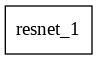

In [59]:
plot_model(resnet_model , to_file = "resnet.png" , show_shapes = True , show_layer_names = True)